# Analyzing H100 FLOPs

| Form Factor | FP64          | FP64 Tensor Core | FP32          | TF32 Tensor Core | BFLOAT16 Tensor Core | FP16 Tensor Core | FP8 Tensor Core   |
|-------------|---------------|------------------|---------------|------------------|----------------------|------------------|-------------------|
| H100 SXM    | 34 teraFLOPS  | 67 teraFLOPS     | 67 teraFLOPS  | 989 teraFLOPS   | 1,979 teraFLOPS     | 1,979 teraFLOPS | 3,958 teraFLOPS  |
| H100 PCIe   | 26 teraFLOPS  | 51 teraFLOPS     | 51 teraFLOPS  | 756 teraFLOPS   | 1,513 teraFLOPS     | 1,513 teraFLOPS | 3,026 teraFLOPS  |
| H100 NVL1   | 68 teraFLOPs  | 134 teraFLOPs    | 134 teraFLOPs | 1,979 teraFLOPS | 3,958 teraFLOPS     | 3,958 teraFLOPS | 7,916 teraFLOPS  |


[Datasource](https://www.nvidia.com/en-us/data-center/h100/)


In [92]:
!pip install pandas matplotlib




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [93]:
import pandas as pd
pd.set_option('display.max_rows', None) #force all rows to print


# Hard coded data transposed
data = {
    "Form Factor": ["H100 SXM", "H100 PCIe", "H100 NVL1"],
    "FP64": [3.4E+13, 2.6E+13, 6.8E+13],
    "FP64 Tensor Core": [6.7E+13, 5.1E+13, 1.34E+14],
    "FP32": [6.7E+13, 5.1E+13, 1.34E+14],
    "TF32 Tensor Core": [9.89E+14, 7.56E+14, 1.979E+15],
    "BFLOAT16 Tensor Core": [1.979E+15, 1.513E+15, 3.958E+15],
    "FP16 Tensor Core": [1.979E+15, 1.513E+15, 3.958E+15],
    "FP8 Tensor Core": [3.958E+15, 3.026E+15, 7.916E+15]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the 'Form Factor' column as the index of the dataframe
df.set_index("Form Factor", inplace=True)


## Raw Data

In [94]:
# Display the DataFrame
df

,FP64,FP64 Tensor Core,FP32,TF32 Tensor Core,BFLOAT16 Tensor Core,FP16 Tensor Core,FP8 Tensor Core
Form Factor,,,,,,,
H100 SXM,3.400000e+13,6.700000e+13,6.700000e+13,9.890000e+14,1.979000e+15,1.979000e+15,3.958000e+15
H100 PCIe,2.600000e+13,5.100000e+13,5.100000e+13,7.560000e+14,1.513000e+15,1.513000e+15,3.026000e+15
H100 NVL1,6.800000e+13,1.340000e+14,1.340000e+14,1.979000e+15,3.958000e+15,3.958000e+15,7.916000e+15


# What questions do I want to ask of the data?
* how many operations can a single GPU do in a year?
* what percentage of threshold can a single GPU do in a year?
* knowing the target of 10^26, how many GPUs does it take to do it in a year?
* How quickly (days) can we get there with 512 GPUs? 2k GPUs? 10K GPUs?

In [95]:
# computation limit 
threshold_operations_sum = 10**26
# Calculate the number of seconds in a year
seconds_in_year = 365 * 24 * 60 * 60

seconds_in_hour = 60 * 60

seconds_in_day = 60 * 60 * 24

## how many operations can a single GPU do in a year?


In [96]:

# Perform the calculation across the entire DataFrame to find the percentage of the threshold
operations_in_one_year = ((df * seconds_in_year))

operations_in_one_year  

,FP64,FP64 Tensor Core,FP32,TF32 Tensor Core,BFLOAT16 Tensor Core,FP16 Tensor Core,FP8 Tensor Core
Form Factor,,,,,,,
H100 SXM,1.072224e+21,2.112912e+21,2.112912e+21,3.118910e+22,6.240974e+22,6.240974e+22,1.248195e+23
H100 PCIe,8.199360e+20,1.608336e+21,1.608336e+21,2.384122e+22,4.771397e+22,4.771397e+22,9.542794e+22
H100 NVL1,2.144448e+21,4.225824e+21,4.225824e+21,6.240974e+22,1.248195e+23,1.248195e+23,2.496390e+23


## what percentage of threshold can a single GPU do in a year?


In [97]:
# Perform the calculation across the entire DataFrame to find the percentage of the threshold
percentage_of_threshold_accomplished_in_one_year = ((df * seconds_in_year) / threshold_operations_sum) * 100

# Format the DataFrame to show percentages nicely
formatted_percentage_df = percentage_of_threshold_accomplished_in_one_year.map(lambda x: "{:.2f}%".format(x))

formatted_percentage_df  # This will print the DataFrame with the formatted percentages

,FP64,FP64 Tensor Core,FP32,TF32 Tensor Core,BFLOAT16 Tensor Core,FP16 Tensor Core,FP8 Tensor Core
Form Factor,,,,,,,
H100 SXM,0.00%,0.00%,0.00%,0.03%,0.06%,0.06%,0.12%
H100 PCIe,0.00%,0.00%,0.00%,0.02%,0.05%,0.05%,0.10%
H100 NVL1,0.00%,0.00%,0.00%,0.06%,0.12%,0.12%,0.25%


## knowing the target of 10^26, how many GPUs does it take to do it in a year?


In [98]:
needed_GPU_quantity_to_meet_threshold_in_one_year = 100 / percentage_of_threshold_accomplished_in_one_year 
needed_GPU_quantity_to_meet_threshold_in_one_year

,FP64,FP64 Tensor Core,FP32,TF32 Tensor Core,BFLOAT16 Tensor Core,FP16 Tensor Core,FP8 Tensor Core
Form Factor,,,,,,,
H100 SXM,93264.09407,47328.047737,47328.047737,3206.247926,1602.313895,1602.313895,801.156948
H100 PCIe,121960.738399,62176.062713,62176.062713,4194.416929,2095.822339,2095.822339,1047.911169
H100 NVL1,46632.047035,23664.023868,23664.023868,1602.313895,801.156948,801.156948,400.578474


## How quickly (days) can we get there with 512 GPUs? 2k GPUs? 10K GPUs?

In [99]:
days_to_solution_by_size = pd.DataFrame()
cluster_size = 256

while cluster_size < 10000:
    operations_in_one_day = ((df * seconds_in_day)) 
    cluster_operations_per_day = operations_in_one_day * cluster_size
    days_to_solution = threshold_operations_sum / cluster_operations_per_day
    days_to_solution['Cluster_Size'] = cluster_size
    

    # Append this iteration's DataFrame to the results DataFrame
    days_to_solution_by_size = pd.concat([days_to_solution_by_size, days_to_solution])


    cluster_size*=2


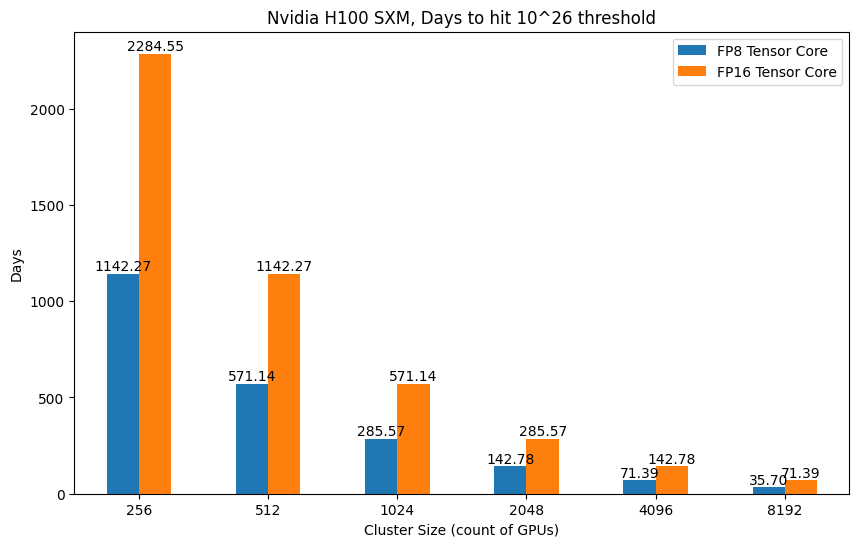

In [100]:
import matplotlib.pyplot as plt


# Filter the DataFrame for 'H100 SXM' index
subset_df = days_to_solution_by_size.loc['H100 SXM']

# Set 'Cluster_Size' as the index
subset_df.set_index('Cluster_Size', inplace=True)

# Create a bar graph
ax = subset_df[['FP8 Tensor Core', 'FP16 Tensor Core']].plot(kind='bar', figsize=(10, 6), legend=False)
plt.xlabel('Cluster Size (count of GPUs)')
plt.ylabel('Days')
plt.title('Nvidia H100 SXM, Days to hit 10^26 threshold')
plt.xticks(rotation=0)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(['FP8 Tensor Core', 'FP16 Tensor Core'])

plt.show()